In [13]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_groq import ChatGroq
import pandas as pd

In [14]:
df = pd.read_csv('winequality-red.csv')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
input_data= df[:90].to_json()
column='pH'
original_value = df[column][0]

In [16]:
df.groupby('quality')['alcohol'].mean()

quality
3     9.955000
4    10.265094
5     9.899706
6    10.629519
7    11.465913
8    12.094444
Name: alcohol, dtype: float64

In [17]:
llm_model = ChatGroq(temperature=0, groq_api_key='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', model_name="mixtral-8x7b-32768")

In [18]:
from langchain.pydantic_v1 import BaseModel, Field
from langchain.tools import BaseTool
from typing import Any, Optional, Type, Dict
from langchain.callbacks.manager import CallbackManagerForToolRun

In [19]:
class InputData(BaseModel):
    input_data: str = Field(description='The list of values in JSON format to take in as the input data')

In [20]:
import pandas as pd

class StatisticalAnalysisAgent(BaseTool):
    name= "StatisticalAnalysis"
    description="Get statistics for a column"
    args_schema: Type[BaseModel] = InputData

    # def __init__(self, dataframe):
    #     self.dataframe = dataframe

    def _run(self, input_data: str, run_manager: Optional[CallbackManagerForToolRun] = None) -> str:
        if column not in pd.read_json(input_data).columns:
            return f"Column {column} does not exist in the dataframe."
        
        stats = pd.read_json(input_data)[column].describe()
        return stats.to_string()

# Example usage
stat_agent = StatisticalAnalysisAgent()
print(stat_agent._run(input_data)) 

count    90.000000
mean      3.331889
std       0.141849
min       2.930000
25%       3.250000
50%       3.340000
75%       3.410000
max       3.900000


/var/folders/5_/_rwfr5wd1bs3_rm90_v0cm900000gp/T/ipykernel_15334/3999433957.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  if column not in pd.read_json(input_data).columns:
/var/folders/5_/_rwfr5wd1bs3_rm90_v0cm900000gp/T/ipykernel_15334/3999433957.py:15: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  stats = pd.read_json(input_data)[column].describe()


/var/folders/5_/_rwfr5wd1bs3_rm90_v0cm900000gp/T/ipykernel_15334/3056853500.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  if column not in pd.read_json(input_data).columns:
/var/folders/5_/_rwfr5wd1bs3_rm90_v0cm900000gp/T/ipykernel_15334/3056853500.py:15: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  plt.hist(pd.read_json(input_data)[column], bins=10, edgecolor='black')


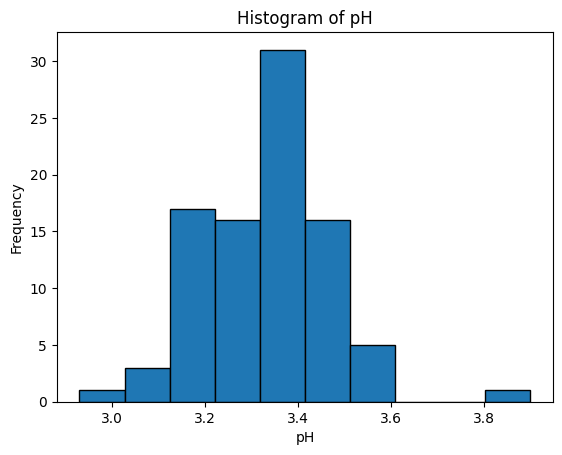

None


In [21]:
import matplotlib.pyplot as plt

class DataVisualizationAgent(BaseTool):
    name= "Plot Histogram"
    description="Plot histogram"
    args_schema: Type[BaseModel] = InputData
    
    # def __init__(self, dataframe):
    #     self.dataframe = dataframe

    def _run(self, input_data: str, run_manager: Optional[CallbackManagerForToolRun] = None) -> str:
        if column not in pd.read_json(input_data).columns:
            return f"Column {column} does not exist in the dataframe."
        
        plt.hist(pd.read_json(input_data)[column], bins=10, edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Example usage
viz_agent = DataVisualizationAgent()
print(viz_agent._run(input_data))


In [22]:
class DataFilteringAgent(BaseTool):

    name= "Filter Data"
    description="Filter data based on a condition"
    args_schema: Type[BaseModel] = InputData

    # def __init__(self, dataframe):
    #     self.dataframe = dataframe

    def _run(self, input_data: str, run_manager: Optional[CallbackManagerForToolRun] = None) -> str:
        try:
            df = pd.read_json(input_data)
            filtered_df = df[df[column] > 0.9978][column]
            return filtered_df
        except Exception as e:
            return f"Error in filtering data: {e}"

# Example usage
filter_agent = DataFilteringAgent()
print(filter_agent._run(input_data))

0     3.51
1     3.20
2     3.26
3     3.16
4     3.51
      ... 
85    3.41
86    2.93
87    3.39
88    3.14
89    3.48
Name: pH, Length: 90, dtype: float64


/var/folders/5_/_rwfr5wd1bs3_rm90_v0cm900000gp/T/ipykernel_15334/2708242405.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(input_data)


In [23]:
# class CorrelationAnalysisAgent:
#     def __init__(self, dataframe):
#         self.dataframe = dataframe

#     def get_correlation_matrix(self, *args):
#         corr_matrix = self.dataframe.corr()
#         return corr_matrix.to_string()

# # Example usage
# corr_agent = CorrelationAnalysisAgent(df)
# print(corr_agent.get_correlation_matrix())


In [24]:
# class SummarizationAgent(BaseTool):

#     name= "Summarize Data"
#     description="Summarize the dataset"
#     args_schema: Type[BaseModel] = InputData
    
#     # def __init__(self, dataframe):
#     #     self.dataframe = dataframe

#     def _run(self, input_data: str, run_manager: Optional[CallbackManagerForToolRun] = None) -> str:
#         summary = ""
#         # for column in pd.read_json(input_data).columns:
#         stats = pd.read_json(input_data)[column].describe()
#         summary += f"Statistics for {column}:\n{stats.to_string()}\n\n"
#         return summary

class SummarizationAgent(BaseTool):
    name = "Summarize Data"
    description = "Summarize the dataset"
    args_schema: Type[BaseModel] = InputData

    def _run(self, input_data: InputData, run_manager: Optional[CallbackManagerForToolRun] = None) -> str:
        try:
            df = pd.read_json(input_data)
            
            if column not in df.columns:
                return f"Column '{column}' not found in the dataframe."

            if pd.api.types.is_numeric_dtype(df[column]):
                stats = df[column].describe()
                summary = f"Statistics for {column}:\n{stats.to_string()}\n\n"

                # Define thresholds for high, medium, and low density
                high_threshold = stats['75%']  # Upper quartile
                low_threshold = stats['25%']   # Lower quartile

                high_density_count = df[df[column] > high_threshold][column].count()
                medium_density_count = df[(df[column] <= high_threshold) & (df[column] >= low_threshold)][column].count()
                low_density_count = df[df[column] < low_threshold][column].count()

                summary += f"{column} Counts for {column}:\n"
                summary += f"High {column} (>{high_threshold}): {high_density_count}\n"
                summary += f"Medium {column} ({low_threshold} to {high_threshold}): {medium_density_count}\n"
                summary += f"Low {column} (<{low_threshold}): {low_density_count}\n\n"
            else:
                summary = f"Column '{column}' is not numeric and cannot be summarized with statistics and density counts."

            return summary
        except Exception as e:
            return f"Error in summarizing data: {e}"
    
# Example usage
summary_agent = SummarizationAgent()
print(summary_agent._run(input_data))


Statistics for pH:
count    90.000000
mean      3.331889
std       0.141849
min       2.930000
25%       3.250000
50%       3.340000
75%       3.410000
max       3.900000

pH Counts for pH:
High pH (>3.41): 22
Medium pH (3.25 to 3.41): 46
Low pH (<3.25): 22




/var/folders/5_/_rwfr5wd1bs3_rm90_v0cm900000gp/T/ipykernel_15334/1576422434.py:24: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(input_data)


Statistical Analysis Agent: Computes and returns basic statistics for a given column.


Data Visualization Agent: Plots a histogram for a given column.


Data Filtering Agent: Filters the dataset based on a user-provided condition.


Correlation Analysis Agent: Returns the correlation matrix for the dataframe.


Summarization Agent: Provides a summary of the dataset, including basic statistics for each column.

In [25]:
tools = [StatisticalAnalysisAgent(), DataVisualizationAgent(), DataFilteringAgent(), SummarizationAgent()]

In [26]:
from langchain.agents import Tool, initialize_agent

In [27]:
PREFIX = """Your task is to perform statistical analysis.
The input will be the data in JSON format but only take the values in the column specified as a list
You have access to the following tools:
Use the observations from the tools used to determine the next steps.
At any step if an action cannot be executed then simply state the error clearly"""

FORMAT_INSTRUCTIONS = """Use the following format:
Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: Task finished"""

SUFFIX = """Begin!
Question: {input}
Thought:{agent_scratchpad}"""


In [28]:
agent_chain = initialize_agent(tools, llm_model, agent="zero-shot-react-description", handle_parsing_errors=True, verbose=True,
                               agent_kwargs={'prefix':PREFIX,
                                             'format_instructions':FORMAT_INSTRUCTIONS,
                                             'suffix':SUFFIX})

/Users/qanand/Downloads/capstone/venv/lib/python3.11/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 0.3.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  warn_deprecated(


In [46]:
class WrapperAgent:
    def __init__(self, agents):
        self.agents = agents
    args_schema: Type[BaseModel] = InputData
        
    def _run(self, input_data: InputData, run_manager: Optional[CallbackManagerForToolRun] = None) -> str:
        current_data = input_data
        
        for agent in self.agents:
            # agent_input_data = InputData(dataframe=current_data)
            result = agent._run(input_data)
            print(f"Result from {agent.name}: {result}")  # Debug: Print result from each agent
            if result is None:
                return f"Error: Agent {agent.name} returned None."
            if "Error" in result:
                return result  # Stop if any agent returns an error
            # Update current_data if the agent modifies the DataFrame
            if isinstance(result, str) and result.startswith("data:image"):
                # It's an image, return it as is
                return result
            current_data = result  # Pass the updated DataFrame to the next agent
        return current_data

# Initialize agents
stat_agent = StatisticalAnalysisAgent()
viz_agent = DataVisualizationAgent()
filter_agent = DataFilteringAgent()
summary_agent = SummarizationAgent()

# Create a list of agents to run sequentially
agents = [stat_agent, filter_agent, summary_agent, viz_agent]

# Initialize the wrapper agent
wrapper_agent = WrapperAgent(agents)

Result from StatisticalAnalysis: count    90.000000
mean      3.331889
std       0.141849
min       2.930000
25%       3.250000
50%       3.340000
75%       3.410000
max       3.900000
Result from Filter Data: 0     3.51
1     3.20
2     3.26
3     3.16
4     3.51
      ... 
85    3.41
86    2.93
87    3.39
88    3.14
89    3.48
Name: pH, Length: 90, dtype: float64
Result from Summarize Data: Statistics for pH:
count    90.000000
mean      3.331889
std       0.141849
min       2.930000
25%       3.250000
50%       3.340000
75%       3.410000
max       3.900000

pH Counts for pH:
High pH (>3.41): 22
Medium pH (3.25 to 3.41): 46
Low pH (<3.25): 22




/var/folders/5_/_rwfr5wd1bs3_rm90_v0cm900000gp/T/ipykernel_15334/3999433957.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  if column not in pd.read_json(input_data).columns:
/var/folders/5_/_rwfr5wd1bs3_rm90_v0cm900000gp/T/ipykernel_15334/3999433957.py:15: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  stats = pd.read_json(input_data)[column].describe()
/var/folders/5_/_rwfr5wd1bs3_rm90_v0cm900000gp/T/ipykernel_15334/2708242405.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(input_data)
/var/folders/5_/_rwfr5wd1bs3_rm90_v0cm900000gp/T/ipykernel_15334/1576422434.py:24: FutureWarning: Passing

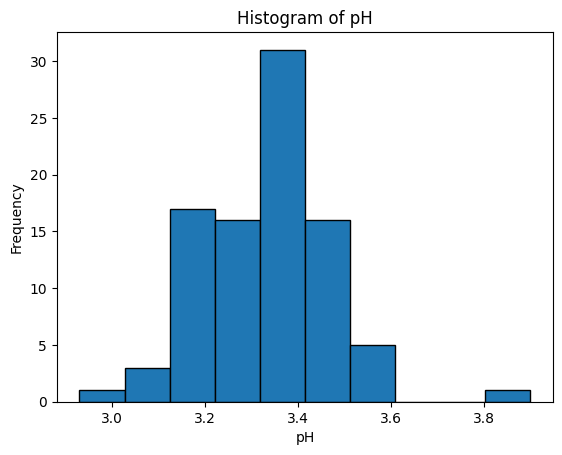

Result from Plot Histogram: None
Error: Agent Plot Histogram returned None.


In [48]:
print(wrapper_agent._run(input_data))



> Entering new AgentExecutor chain...
I need to extract the data from the 'pH' column of the input JSON data and then plot a histogram using this data.

Action: Plot Histogram
Action Input: {"pH": [3.51, 3.2, 3.26, 3.16, 3.51, 3.51, 3.3, 3.39, 3.36, 3.35, 3.28, 3.35, 3.58, 3.26, 3.16, 3.17, 3.3, 3.11, 3.38, 3.04, 3.39, 3.52, 3.17, 3.17, 3.43, 3.34, 3.28, 3.17, 3.47, 3.38, 3.4, 3.42, 3.33, 3.33, 3.26, 3.21, 3.3, 3.48, 3.9, 3.25, 3.25, 3.34, 3.32, 3.15, 3.4, 3.39, 3.39, 3.5, 3.44, 3.41, 3.41, 3.42, 3.44, 3.28, 3.34, 3.32, 3.32, 3.31, 3.31, 3.28, 3.54, 3.54, 3.52, 3.38, 3.16, 3.41, 3.13, 3.36, 3.16, 3.44, 3.41, 2.93, 3.39, 3.14, 3.48]}

/var/folders/5_/_rwfr5wd1bs3_rm90_v0cm900000gp/T/ipykernel_5946/3056853500.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  if column not in pd.read_json(input_data).columns:
/var/folders/5_/_rwfr5wd1bs3_rm90_v0cm900000gp/T/ipykernel_5946/3056853500.py:15: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  plt.hist(pd.read_json(input_data)[column], bins=10, edgecolor='black')


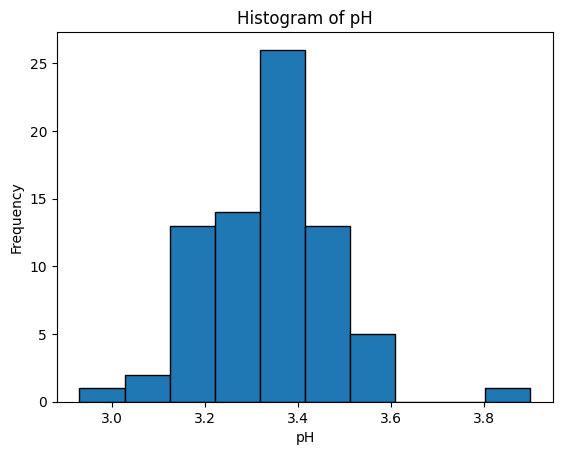


Observation: None
Thought:I have successfully plotted the histogram using the 'pH' column data. The pH values range from around 2.9 to 3.9 and from 3.1 to 3.6, with a smaller number of data points at higher pH values, up to around 3.9. There is a noticeable peak around 3.3 and another one around 3.5.

Final Answer: Task finished

> Finished chain.


{'input': 'This is the data:\n{"fixed acidity":{"0":7.4,"1":7.8,"2":7.8,"3":11.2,"4":7.4,"5":7.4,"6":7.9,"7":7.3,"8":7.8,"9":7.5,"10":6.7,"11":7.5,"12":5.6,"13":7.8,"14":8.9,"15":8.9,"16":8.5,"17":8.1,"18":7.4,"19":7.9,"20":8.9,"21":7.6,"22":7.9,"23":8.5,"24":6.9,"25":6.3,"26":7.6,"27":7.9,"28":7.1,"29":7.8,"30":6.7,"31":6.9,"32":8.3,"33":6.9,"34":5.2,"35":7.8,"36":7.8,"37":8.1,"38":5.7,"39":7.3,"40":7.3,"41":8.8,"42":7.5,"43":8.1,"44":6.8,"45":4.6,"46":7.7,"47":8.7,"48":6.4,"49":5.6,"50":8.8,"51":6.6,"52":6.6,"53":8.6,"54":7.6,"55":7.7,"56":10.2,"57":7.5,"58":7.8,"59":7.3,"60":8.8,"61":7.7,"62":7.5,"63":7.0,"64":7.2,"65":7.2,"66":7.5,"67":6.6,"68":9.3,"69":8.0,"70":7.7,"71":7.7,"72":7.7,"73":8.3,"74":9.7,"75":8.8,"76":8.8,"77":6.8,"78":6.7,"79":8.3,"80":6.2,"81":7.8,"82":7.4,"83":7.3,"84":6.3,"85":6.9,"86":8.6,"87":7.7,"88":9.3,"89":7.0},"volatile acidity":{"0":0.7,"1":0.88,"2":0.76,"3":0.28,"4":0.7,"5":0.66,"6":0.6,"7":0.65,"8":0.58,"9":0.5,"10":0.58,"11":0.5,"12":0.615,"13":0.61,"14

In [ ]:
agent_chain.invoke(f'This is the data:\n{input_data}.\nPlot a histogram using the data in the `{column}` column')

In [56]:
column = 'density'

Result from StatisticalAnalysis: count    90.000000
mean      0.996839
std       0.001041
min       0.993400
25%       0.996200
50%       0.996800
75%       0.997575
max       0.999300
Result from Filter Data: 3     0.9980
14    0.9986
15    0.9986
21    0.9982
33    0.9993
35    0.9986
57    0.9983
60    0.9980
74    0.9984
75    0.9986
76    0.9986
Name: density, dtype: float64
Result from Summarize Data: Statistics for density:
count    90.000000
mean      0.996839
std       0.001041
min       0.993400
25%       0.996200
50%       0.996800
75%       0.997575
max       0.999300

density Counts for density:
High density (>0.9975750000000001): 23
Medium density (0.9962000000000001 to 0.9975750000000001): 49
Low density (<0.9962000000000001): 18




/var/folders/5_/_rwfr5wd1bs3_rm90_v0cm900000gp/T/ipykernel_15334/3999433957.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  if column not in pd.read_json(input_data).columns:
/var/folders/5_/_rwfr5wd1bs3_rm90_v0cm900000gp/T/ipykernel_15334/3999433957.py:15: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  stats = pd.read_json(input_data)[column].describe()
/var/folders/5_/_rwfr5wd1bs3_rm90_v0cm900000gp/T/ipykernel_15334/2708242405.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(input_data)
/var/folders/5_/_rwfr5wd1bs3_rm90_v0cm900000gp/T/ipykernel_15334/1576422434.py:24: FutureWarning: Passing

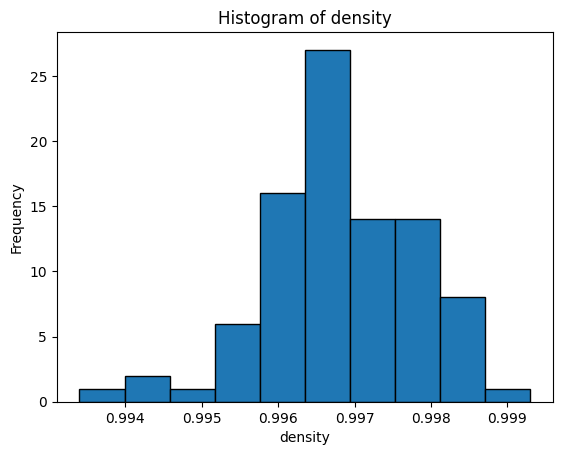

Result from Plot Histogram: None
Error: Agent Plot Histogram returned None.


In [57]:
print(wrapper_agent._run(input_data))

In [ ]:
# # Initialize agents
# stat_agent = StatisticalAnalysisAgent(df)
# viz_agent = DataVisualizationAgent(df)
# filter_agent = DataFilteringAgent(df)
# corr_agent = CorrelationAnalysisAgent(df)
# summary_agent = SummarizationAgent(df)

# # Define tools for LangChain
# tools = [
#     Tool(name="Get Statistics", func=stat_agent.get_statistics, description="Get statistics for a column"),
#     Tool(name="Plot Histogram", func=viz_agent.plot_histogram, description="Plot histogram for a column"),
#     Tool(name="Filter Data", func=filter_agent.filter_data, description="Filter data based on a condition"),
#     Tool(name="Correlation Matrix", func=corr_agent.get_correlation_matrix, description="Get correlation matrix"),
#     Tool(name="Summarize Data", func=summary_agent.summarize, description="Summarize the dataset")
# ]

# # Initialize LangChain agent
# memory = ConversationBufferMemory(memory_key="chat_history")
# llm = ChatGroq(temperature=0, groq_api_key='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', model_name="mixtral-8x7b-32768")
# agent_chain = initialize_agent(tools, llm, agent="zero-shot-react-description", memory=memory, handle_parsing_errors=True, verbose=True)


# # Example workflow
# response = agent_chain.run("Load the dataset and show the summary.")
# print(response)

# response = agent_chain.run("Get statistics for 'fixed acidity'.")
# print(response)

# response = agent_chain.run("Plot histogram for fixed acidity.")
# print(response)

# response = agent_chain.run("Show rows where quality is greater than 5.")
# print(response)

# response = agent_chain.run("Get the correlation matrix of the dataset.")
# print(response)